## Winpython with R : comparing DPLYR and Pandas


It is based on the Thomas Augspurger comparison [Notebook](http://nbviewer.ipython.org/urls/gist.githubusercontent.com/TomAugspurger/6e052140eaa5fdb6e8c0/raw/811585624e843f3f80b9b6fe89e18119d7d2d73c/dplyr_pandas.ipynb) (refreshed for Pandas 0.16.0)

http://nbviewer.ipython.org/urls/gist.githubusercontent.com/TomAugspurger/6e052140eaa5fdb6e8c0/raw/811585624e843f3f80b9b6fe89e18119d7d2d73c/dplyr_pandas.ipynb

We just play the "R" code at the same time, instead of keeping it in comments

In [1]:
!echo %R_HOME%

D:\WinPython\basedir34\buildFlavorRfull\winpython-3.4.3.2.amd64\tools\R


In [2]:
# Some prep work to get the data from R and into pandas
%matplotlib inline
#bad tetst : move magic befor module imprort
#%load_ext rpy2.ipython

import rpy2
%load_ext rpy2.ipython
from rpy2.robjects.conversion import ri2py
from rpy2.ipython.rmagic import ri2ipython
ri2ipython.register(rpy2.robjects.Sexp, ri2py)
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_rows", 5)

##### Transform this Markdown cell to a Code cell, if ever you need to re-feed a basic R environnement

%R install.packages("tidyr")

%R install.packages("dplyr") 

%R install.packages("ggplot2")

%R install.packages("rvest")

%R install.packages('RSQLite') 

%R install.packages("zoo") 

%R install.packages("forecast") 

%R install.packages('R.utils')

%R install.packages("nycflights13")

%R install.packages('hflights')



### Thomas Augspurger part (with comments replaced by true %R code)
This notebook compares [pandas](http://pandas.pydata.org)
and [dplyr](http://cran.r-project.org/web/packages/dplyr/index.html).
The comparison is just on syntax (verbage), not performance. Whether you're an R user looking to switch to pandas (or the other way around), I hope this guide will help ease the transition.

We'll work through the [introductory dplyr vignette](http://cran.r-project.org/web/packages/dplyr/vignettes/introduction.html) to analyze some flight data.

I'm working on a better layout to show the two packages side by side.
But for now I'm just putting the ``dplyr`` code in a comment above each python call.

In [3]:
%%R
library("dplyr") # for functions
library("nycflights13")
write.csv(flights, "flights.csv")

# Data: nycflights13

In [4]:
flights = pd.read_csv("flights.csv", index_col=0)

In [5]:
%R dim(flights)

array([336776,     16], dtype=int32)

In [6]:
# dim(flights)   <--- The R code
flights.shape  # <--- The python code

(336776, 16)

In [7]:
%R head(flights)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
1,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2013,1,1,554,-6,812,-25,DL,N668DN,461,LGA,ATL,116,762,5,54
5,2013,1,1,554,-4,740,12,UA,N39463,1696,EWR,ORD,150,719,5,54


In [8]:
# head(flights)
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
3,2013,1,1,542,2,923,33,AA,N619AA,1141,JFK,MIA,160,1089,5,42
4,2013,1,1,544,-1,1004,-18,B6,N804JB,725,JFK,BQN,183,1576,5,44
5,2013,1,1,554,-6,812,-25,DL,N668DN,461,LGA,ATL,116,762,5,54


# Single table verbs

``dplyr`` has a small set of nicely defined verbs. I've listed their closest pandas verbs.


<table>
  <tr>
    <td><b>dplyr</b></td>
    <td><b>pandas</b></td>
  </tr>
  <tr>
    <td>filter() (and slice())</td>
    <td>query() (and loc[], iloc[])</td>
  </tr>
  <tr>
    <td>arrange()</td>
    <td>sort()</td>
  </tr>
  <tr>
  <td>select() (and rename())</td>
    <td>\_\_getitem\_\_ (and rename())</td>
  </tr>
  <tr>
  <td>distinct()</td>
    <td>drop_duplicates()</td>
  </tr>
  <tr>
    <td>mutate() (and transmute())</td>
    <td>None</td>
  </tr>
  <tr>
    <td>summarise()</td>
    <td>None</td>
  </tr>
  <tr>
    <td>sample_n() and sample_frac()</td>
    <td>None</td>
  </tr>
</table>


Some of the "missing" verbs in pandas are because there are other, different ways of achieving the same goal. For example `summarise` is spread across `mean`, `std`, etc. Others, like `sample_n`, just haven't been implemented yet.

# Filter rows with filter(), query()

In [9]:
%R filter(flights, month == 1, day == 1)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
1,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,2013,1,1,-2147483648,NaN,-2147483648,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
841,2013,1,1,-2147483648,NaN,-2147483648,NaN,B6,N618JB,125,JFK,FLL,NaN,1069,NaN,NaN


In [10]:
# filter(flights, month == 1, day == 1)
flights.query("month == 1 & day == 1")

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
842,2013,1,1,NaN,NaN,NaN,NaN,B6,N618JB,125,JFK,FLL,NaN,1069,NaN,NaN


The more verbose version:

In [11]:
%R flights[flights$month == 1 & flights$day == 1, ]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
1,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,2013,1,1,-2147483648,NaN,-2147483648,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
841,2013,1,1,-2147483648,NaN,-2147483648,NaN,B6,N618JB,125,JFK,FLL,NaN,1069,NaN,NaN


In [12]:
# flights[flights$month == 1 & flights$day == 1, ]
flights[(flights.month == 1) & (flights.day == 1)]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
842,2013,1,1,NaN,NaN,NaN,NaN,B6,N618JB,125,JFK,FLL,NaN,1069,NaN,NaN


In [13]:
%R slice(flights, 1:10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
1,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,2013,1,1,557,-3,838,-8,B6,N593JB,79,JFK,MCO,140,944,5,57
9,2013,1,1,558,-2,753,8,AA,N3ALAA,301,LGA,ORD,138,733,5,58


In [14]:
# slice(flights, 1:10)
flights.iloc[:9]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,2013,1,1,557,-3,709,-14,EV,N829AS,5708,LGA,IAD,53,229,5,57
9,2013,1,1,557,-3,838,-8,B6,N593JB,79,JFK,MCO,140,944,5,57


# Arrange rows with arrange(), sort()

In [15]:
%R arrange(flights, year, month, day) 

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
1,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336774,2013,12,31,-2147483648,NaN,-2147483648,NaN,UA,,219,EWR,ORD,NaN,719,NaN,NaN
336775,2013,12,31,-2147483648,NaN,-2147483648,NaN,UA,,443,JFK,LAX,NaN,2475,NaN,NaN


In [16]:
# arrange(flights, year, month, day) 
flights.sort(['year', 'month', 'day'])

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111295,2013,12,31,NaN,NaN,NaN,NaN,UA,NaN,219,EWR,ORD,NaN,719,NaN,NaN
111296,2013,12,31,NaN,NaN,NaN,NaN,UA,NaN,443,JFK,LAX,NaN,2475,NaN,NaN


In [17]:
%R arrange(flights, desc(arr_delay))

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,9,641,1301,1242,1272,HA,N384HA,51,JFK,HNL,640,4983,6,41
1,2013,6,15,1432,1137,1607,1127,MQ,N504MQ,3535,JFK,CMH,74,483,14,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336774,2013,9,30,-2147483648,NaN,-2147483648,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
336775,2013,9,30,-2147483648,NaN,-2147483648,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


In [18]:
# arrange(flights, desc(arr_delay))
flights.sort('arr_delay', ascending=False)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
7073,2013,1,9,641,1301,1242,1272,HA,N384HA,51,JFK,HNL,640,4983,6,41
235779,2013,6,15,1432,1137,1607,1127,MQ,N504MQ,3535,JFK,CMH,74,483,14,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


# Select columns with select(), []

In [19]:
%R select(flights, year, month, day) 

,year,month,day
0,2013,1,1
1,2013,1,1
...,...,...,...
336774,2013,9,30
336775,2013,9,30


In [20]:
# select(flights, year, month, day) 
flights[['year', 'month', 'day']]

,year,month,day
1,2013,1,1
2,2013,1,1
...,...,...,...
336775,2013,9,30
336776,2013,9,30


In [21]:
%R select(flights, year:day) 

,year,month,day
0,2013,1,1
1,2013,1,1
...,...,...,...
336774,2013,9,30
336775,2013,9,30


In [22]:
# select(flights, year:day) 

# No real equivalent here. Although I think this is OK.
# Typically I'll have the columns I want stored in a list
# somewhere, which can be passed right into __getitem__ ([]).

In [23]:
%%R
select(flights, -(year:day)) 

In [24]:
# select(flights, -(year:day)) 

# Again, simliar story. I would just use
# flights.drop(cols_to_drop, axis=1)
# or fligths[flights.columns.difference(pd.Index(cols_to_drop))]
# point to dplyr!

In [25]:
%R select(flights, tail_num = tailnum)

,tail_num
0,N14228
1,N24211
...,...
336774,N511MQ
336775,N839MQ


In [26]:
# select(flights, tail_num = tailnum)
flights.rename(columns={'tailnum': 'tail_num'})['tail_num']

1         N14228
2         N24211
           ...  
336775    N511MQ
336776    N839MQ
Name: tail_num, dtype: object

But like Hadley mentions, not that useful since it only returns the one column. ``dplyr`` and ``pandas`` compare well here.

In [27]:
%R rename(flights, tail_num = tailnum)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tail_num,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
1,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336774,2013,9,30,-2147483648,NaN,-2147483648,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
336775,2013,9,30,-2147483648,NaN,-2147483648,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


In [28]:
# rename(flights, tail_num = tailnum)
flights.rename(columns={'tailnum': 'tail_num'})

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tail_num,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


Pandas is more verbose, but the the argument to `columns` can be any mapping. So it's often used with a function to perform a common task, say `df.rename(columns=lambda x: x.replace('-', '_'))` to replace any dashes with underscores. Also, ``rename`` (the pandas version) can be applied to the Index.

# Extract distinct (unique) rows 

In [29]:
%R distinct(select(flights, tailnum))

,tailnum
0,N14228
1,N24211
...,...
4042,N785SK
4043,N557AS


In [30]:
# distinct(select(flights, tailnum))
flights.tailnum.unique()

array(['N14228', 'N24211', 'N619AA', ..., 'N776SK', 'N785SK', 'N557AS'], dtype=object)

FYI this returns a numpy array instead of a Series.

In [31]:
%R distinct(select(flights, origin, dest))

,origin,dest
0,EWR,IAH
1,LGA,IAH
...,...,...
222,EWR,ANC
223,EWR,LGA


In [32]:
# distinct(select(flights, origin, dest))
flights[['origin', 'dest']].drop_duplicates()

,origin,dest
1,EWR,IAH
2,LGA,IAH
...,...,...
255456,EWR,ANC
275946,EWR,LGA


OK, so ``dplyr`` wins there from a consistency point of view. ``unique`` is only defined on Series, not DataFrames. The original intention for `drop_duplicates` is to check for records that were accidentally included twice. This feels a bit hacky using it to select the distinct combinations, but it works!

# Add new columns with mutate() 

In [33]:
%R mutate(flights, gain = arr_delay - dep_delay, speed = distance / air_time * 60)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,gain,speed
0,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17,9,370.044053
1,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33,16,374.273128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336774,2013,9,30,-2147483648,NaN,-2147483648,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN,NaN,NaN
336775,2013,9,30,-2147483648,NaN,-2147483648,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN,NaN,NaN


In [34]:
# mutate(flights,
#   gain = arr_delay - dep_delay,
#   speed = distance / air_time * 60)

#before pandas 0.16.0
# flights['gain'] = flights.arr_delay - flights.dep_delay
# flights['speed'] = flights.distance / flights.air_time * 60
# flights
flights.assign(gain=flights.arr_delay - flights.dep_delay,
               speed=flights.distance / flights.air_time * 60)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,gain,speed
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17,9,370.044053
2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33,16,374.273128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN,NaN,NaN
336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN,NaN,NaN


In [35]:
%R mutate(flights, gain = arr_delay - dep_delay, gain_per_hour = gain / (air_time / 60) )


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,gain,gain_per_hour
0,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17,9,2.378855
1,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33,16,4.229075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336774,2013,9,30,-2147483648,NaN,-2147483648,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN,NaN,NaN
336775,2013,9,30,-2147483648,NaN,-2147483648,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN,NaN,NaN


In [36]:
# mutate(flights,
#   gain = arr_delay - dep_delay,
#   gain_per_hour = gain / (air_time / 60)
# )

#before pandas 0.16.0
# flights['gain'] = flights.arr_delay - flights.dep_delay
# flights['gain_per_hour'] = flights.gain / (flights.air_time / 60)
# flights
(flights.assign(gain=flights.arr_delay - flights.dep_delay)
        .assign(gain_per_hour = lambda df: df.gain / (df.air_time / 60)))

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,gain,gain_per_hour
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17,9,2.378855
2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33,16,4.229075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN,NaN,NaN
336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN,NaN,NaN


The first example is pretty much identical (aside from the names, mutate vs. assign).

The second example just comes down to language differences. In R, it's possible to implement a function like mutate where you can refer to gain in the line calcuating gain_per_hour, even though gain hasn't actually been calcuated yet.

In Python, you can have arbitrary keyword arguments to functions (which we needed for .assign), but the order of the argumnets is arbitrary. So you can't have something like df.assign(x=df.a / df.b, y=x **2), because you don't know whether x or y will come first (you'd also get an error saying x is undefined.

To work around that with pandas, you'll need to split up the assigns, and pass in a callable to the second assign. The callable looks at itself to find a column named gain. Since the line above returns a DataFrame with the gain column added, the pipeline goes through just fine.


In [37]:
%R transmute(flights,  gain = arr_delay - dep_delay,  gain_per_hour = gain / (air_time / 60)  )

,gain,gain_per_hour
0,9,2.378855
1,16,4.229075
...,...,...
336774,NaN,NaN
336775,NaN,NaN


In [38]:
# transmute(flights,
#   gain = arr_delay - dep_delay,
#   gain_per_hour = gain / (air_time / 60)
# )

#before pandas 0.16.0
# flights['gain'] = flights.arr_delay - flights.dep_delay
# flights['gain_per_hour'] = flights.gain / (flights.air_time / 60)
# flights[['gain', 'gain_per_hour']]
(flights.assign(gain=flights.arr_delay - flights.dep_delay)
        .assign(gain_per_hour = lambda df: df.gain / (df.air_time / 60))
        [['gain', 'gain_per_hour']])

,gain,gain_per_hour
1,9,2.378855
2,16,4.229075
...,...,...
336775,NaN,NaN
336776,NaN,NaN


# Summarise values with summarise()

In [39]:
flights.dep_delay.mean()

12.639070257304708

# Randomly sample rows with sample_n() and sample_frac()

There's an open PR on [Github](https://github.com/pydata/pandas/pull/7274) to make this nicer (closer to ``dplyr``). For now you can drop down to numpy.

In [40]:
%R sample_n(flights, 10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,12,14,1939,39,2333,78,AA,N339AA,21,JFK,LAX,323,2475,19,39
1,2013,11,6,1954,-6,2221,-18,DL,N964DL,1147,LGA,ATL,113,762,19,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,2013,4,9,1855,-4,2128,3,FL,N981AT,645,LGA,ATL,105,762,18,55
9,2013,7,1,1931,11,2129,-29,UA,N36472,1667,EWR,LAS,271,2227,19,31


In [41]:
# sample_n(flights, 10)
flights.loc[np.random.choice(flights.index, 10)]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
116699,2013,2,7,921,-7,1033,-17,B6,N649JB,4,JFK,BUF,51,301,9,21
105486,2013,12,25,1205,-1,1516,0,B6,N661JB,1129,JFK,RSW,169,1074,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156196,2013,3,22,1037,5,1213,2,EV,N22971,4662,EWR,RDU,72,416,10,37
288597,2013,8,9,NaN,NaN,NaN,NaN,MQ,N735MQ,3493,LGA,CLE,NaN,419,NaN,NaN


In [42]:
%R sample_frac(flights, 0.01)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,6,6,1044,44,1441,6,HA,N384HA,51,JFK,HNL,580,4983,10,44
1,2013,1,24,1110,-4,1259,-16,DL,N338NB,1031,LGA,DTW,79,502,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366,2013,3,19,2107,3,15,16,UA,N847UA,852,EWR,IAH,213,1400,21,7
3367,2013,4,19,1633,28,1922,30,DL,N3736C,539,JFK,DEN,220,1626,16,33


In [43]:
# sample_frac(flights, 0.01)
flights.iloc[np.random.randint(0, len(flights),
                               .1 * len(flights))]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
210476,2013,5,19,1312,107,1435,90,AA,N438AA,327,LGA,ORD,108,733,13,12
68187,2013,11,14,951,-9,1058,-15,US,N953UW,2142,LGA,BOS,39,184,9,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88447,2013,12,6,1242,-3,1447,-2,DL,N943DL,1131,LGA,DTW,85,502,12,42
87856,2013,12,5,2136,36,2254,15,EV,N717EV,5451,LGA,RIC,53,292,21,36


# Grouped operations 

In [44]:
%R planes <- group_by(flights, tailnum)
%R delay <- summarise(planes, count = n(),dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE))
%R delay <- filter(delay, count > 20, dist < 2000)


,tailnum,count,dist,delay
0,,2512,710.257564,NaN
1,N0EGMQ,371,676.188679,9.982955
...,...,...,...,...
2960,N999DN,61,895.459016,14.311475
2961,N9EAMQ,248,674.665323,9.235294


In [45]:
# planes <- group_by(flights, tailnum)
# delay <- summarise(planes,
#   count = n(),
#   dist = mean(distance, na.rm = TRUE),
#   delay = mean(arr_delay, na.rm = TRUE))
# delay <- filter(delay, count > 20, dist < 2000)

planes = flights.groupby("tailnum")
delay = (planes.agg({"year": "count",
                     "distance": "mean",
                     "arr_delay": "mean"})
               .rename(columns={"distance": "dist",
                                "arr_delay": "delay",
                                "year": "count"})
               .query("count > 20 & dist < 2000"))
delay

,dist,delay,count
tailnum,,,
N0EGMQ,676.188679,9.982955,371
N10156,757.947712,12.717241,153
...,...,...,...
N999DN,895.459016,14.311475,61
N9EAMQ,674.665323,9.235294,248


For me, dplyr's ``n()`` looked is a bit starge at first, but it's already growing on me.

I think pandas is more difficult for this particular example.
There isn't as natural a way to mix column-agnostic aggregations (like ``count``) with column-specific aggregations like the other two. You end up writing could like `.agg{'year': 'count'}` which reads, "I want the count of `year`", even though you don't care about `year` specifically.
Additionally assigning names can't be done as cleanly in pandas; you have to just follow it up with a ``rename`` like before.

We may as well reproduce the graph. It looks like ggplots geom_smooth is some kind of lowess smoother. We can either us seaborn:

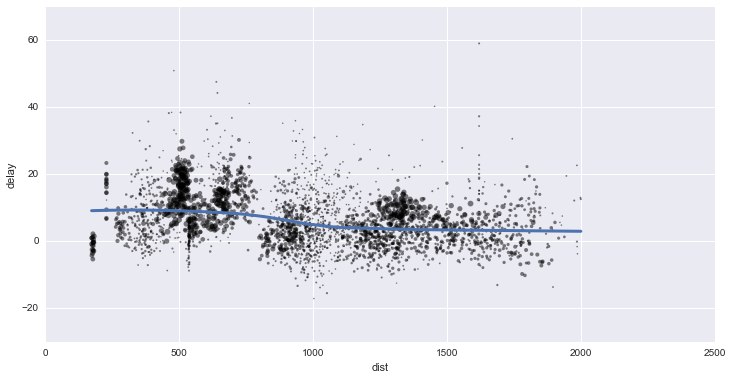

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot("dist", "delay", data=delay, lowess=True, ax=ax,
            scatter_kws={'color': 'k', 'alpha': .5, 's': delay['count'] / 10}, ci=90,
            line_kws={'linewidth': 3});

Or using statsmodels directly for more control over the lowess, with an extremely lazy "confidence interval".

In [47]:
import statsmodels.api as sm

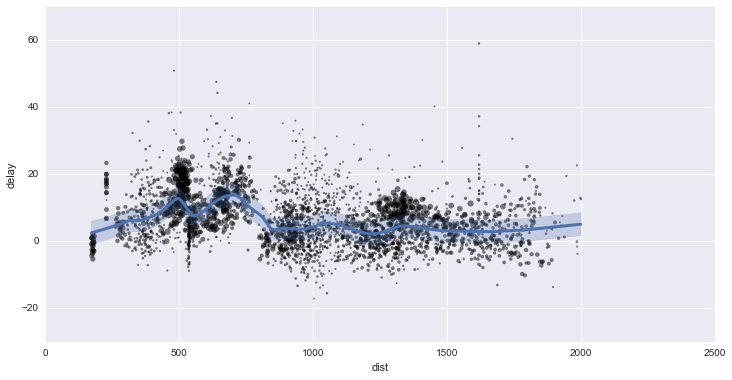

In [48]:
smooth = sm.nonparametric.lowess(delay.delay, delay.dist, frac=1/8)
ax = delay.plot(kind='scatter', x='dist', y = 'delay', figsize=(12, 6),
                color='k', alpha=.5, s=delay['count'] / 10)
ax.plot(smooth[:, 0], smooth[:, 1], linewidth=3);
std = smooth[:, 1].std()
ax.fill_between(smooth[:, 0], smooth[:, 1] - std, smooth[:, 1] + std, alpha=.25);

In [49]:
%R destinations <- group_by(flights, dest)
%R summarise(destinations, planes = n_distinct(tailnum), flights = n())

,dest,planes,flights
0,ABQ,108,254
1,ACK,58,265
...,...,...,...
103,TYS,273,631
104,XNA,176,1036


In [50]:
# destinations <- group_by(flights, dest)
# summarise(destinations,
#   planes = n_distinct(tailnum),
#   flights = n()
# )

destinations = flights.groupby('dest')
destinations.agg({
    'tailnum': lambda x: len(x.unique()),
    'year': 'count'
    }).rename(columns={'tailnum': 'planes',
                       'year': 'flights'})

,planes,flights
dest,,
ABQ,108,254
ACK,58,265
...,...,...
TYS,273,631
XNA,176,1036


Similar to how ``dplyr`` provides optimized C++ versions of most of the `summarise` functions, pandas uses [cython](http://cython.org) optimized versions for most of the `agg` methods.

In [51]:
%R daily <- group_by(flights, year, month, day)
%R (per_day   <- summarise(daily, flights = n()))

,year,month,day,flights
0,2013,1,1,842
1,2013,1,2,943
...,...,...,...,...
363,2013,12,30,968
364,2013,12,31,776


In [52]:
# daily <- group_by(flights, year, month, day)
# (per_day   <- summarise(daily, flights = n()))

daily = flights.groupby(['year', 'month', 'day'])
per_day = daily['distance'].count()
per_day

year  month  day
2013  1      1      842
             2      943
                   ... 
      12     30     968
             31     776
Name: distance, dtype: int64

In [53]:
%R (per_month <- summarise(per_day, flights = sum(flights)))

,year,month,flights
0,2013,1,27004
1,2013,2,24951
...,...,...,...
10,2013,11,27268
11,2013,12,28135


In [54]:
# (per_month <- summarise(per_day, flights = sum(flights)))
per_month = per_day.groupby(level=['year', 'month']).sum()
per_month

year  month
2013  1        27004
      2        24951
               ...  
      11       27268
      12       28135
Name: distance, dtype: int64

In [55]:
%R (per_year  <- summarise(per_month, flights = sum(flights)))

,year,flights
0,2013,336776


In [56]:
# (per_year  <- summarise(per_month, flights = sum(flights)))
per_year = per_month.sum()
per_year

336776

I'm not sure how ``dplyr`` is handling the other columns, like `year`, in the last example. With pandas, it's clear that we're grouping by them since they're included in the groupby. For the last example, we didn't group by anything, so they aren't included in the result.

# Chaining

Any follower of Hadley's [twitter account](https://twitter.com/hadleywickham/) will know how much R users *love* the ``%>%`` (pipe) operator. And for good reason!

In [57]:
%R flights %>% group_by(year, month, day) %>%  select(arr_delay, dep_delay) %>%  summarise( arr = mean(arr_delay, na.rm = TRUE),  dep = mean(dep_delay, na.rm = TRUE)) %>% filter(arr > 30 | dep > 30)

,year,month,day,arr,dep
0,2013,1,16,34.247362,24.612865
1,2013,1,31,32.602854,28.658363
...,...,...,...,...,...
47,2013,12,17,55.871856,40.705602
48,2013,12,23,32.226042,32.254149


In [58]:
# flights %>%
#   group_by(year, month, day) %>%
#   select(arr_delay, dep_delay) %>%
#   summarise(
#     arr = mean(arr_delay, na.rm = TRUE),
#     dep = mean(dep_delay, na.rm = TRUE)
#   ) %>%
#   filter(arr > 30 | dep > 30)
(
flights.groupby(['year', 'month', 'day'])
    [['arr_delay', 'dep_delay']]
    .mean()
    .query('arr_delay > 30 | dep_delay > 30')
)

arr_delay  dep_delay
year month day                      
2013 1     16   34.247362  24.612865
           31   32.602854  28.658363
...                   ...        ...
     12    17   55.871856  40.705602
           23   32.226042  32.254149

[49 rows x 2 columns]

# Other Data Sources

Pandas has tons [IO tools](http://pandas.pydata.org/pandas-docs/version/0.15.0/io.html) to help you get data in and out, including SQL databases via [SQLAlchemy](http://www.sqlalchemy.org).

# Summary

I think pandas held up pretty well, considering this was a vignette written for dplyr. I found the degree of similarity more interesting than the differences. The most difficult task was renaming of columns within an operation; they had to be followed up with a call to ``rename`` *after* the operation, which isn't that burdensome honestly.

More and more it looks like we're moving towards future where being a language or package partisan just doesn't make sense. Not when you can load up a [Jupyter](http://jupyter.org) (formerly IPython) notebook to call up a library written in R, and hand those results off to python or Julia or whatever for followup, before going back to R to make a cool [shiny](http://shiny.rstudio.com) web app.

There will always be a place for your "utility belt" package like dplyr or pandas, but it wouldn't hurt to be familiar with both.

If you want to contribute to pandas, we're always looking for help at https://github.com/pydata/pandas/.
You can get ahold of me directly on [twitter](https://twitter.com/tomaugspurger).